In [1]:
# Imports and data sources
#Source https://www.kaggle.com/rikdifos/credit-card-approval-prediction
fname1 = '../offline_data/application_record.csv'
fname2 = '../offline_data/credit_record.csv'
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading
dfa = pd.read_csv(fname1)
dfc = pd.read_csv(fname2)
print(len(dfa),len(dfc))

438557 1048575


# EDA

In [3]:
# Quick peak
dfa.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


438557


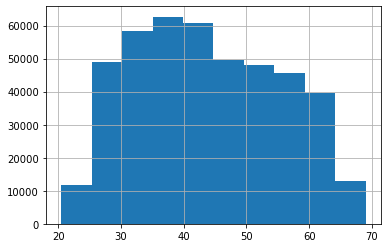

In [4]:
# Add age in years
dfa['age'] = -dfa['DAYS_BIRTH']/365.25
dfa.age.hist()
print(len(dfa))

In [5]:
# Sort by ID and age, we are going to remove older records
dfa = dfa.sort_values(by=['ID','age'], ascending=True)
dfa = dfa.drop_duplicates(subset='ID',keep='last')
print(len(dfa))

438510


In [6]:
# Create some other variables

# No Loan
dfc['no_loan'] =dfc['STATUS'].map(dict(X=1))
dfc.loc[dfc.no_loan.isnull(),'no_loan'] = 0

# Paid off that month
dfc['paid_off'] =dfc['STATUS'].map(dict(C=1))
dfc.loc[dfc.paid_off.isnull(),'paid_off'] = 0

# Months defaulting
import numpy as np
dfc['months'] = dfc['STATUS']
dfc['months'] = dfc['months'].map(dict(C=0,X=0))
dfc.loc[dfc.months.isnull(),'months'] = dfc.loc[dfc.months.isnull(),'STATUS'].astype(float)
#dfc['months'] = dfc['months'].astype(np.float32)

<AxesSubplot:>

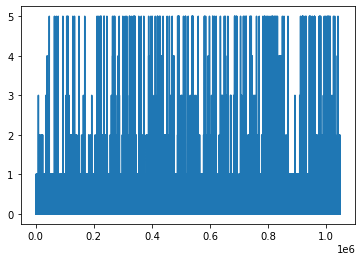

In [7]:
dfc['months'].plot()

In [8]:
dfc_mean = dfc.groupby(by='ID').mean()
dfc_max = dfc.groupby(by='ID').max()
dfc_sum = dfc.groupby(by='ID').sum()
dfc_count = dfc[['STATUS','ID']].groupby(by='ID').count()

array([[<AxesSubplot:title={'center':'pay_rate'}>,
        <AxesSubplot:title={'center':'default_rate'}>],
       [<AxesSubplot:title={'center':'usuage'}>, <AxesSubplot:>]],
      dtype=object)

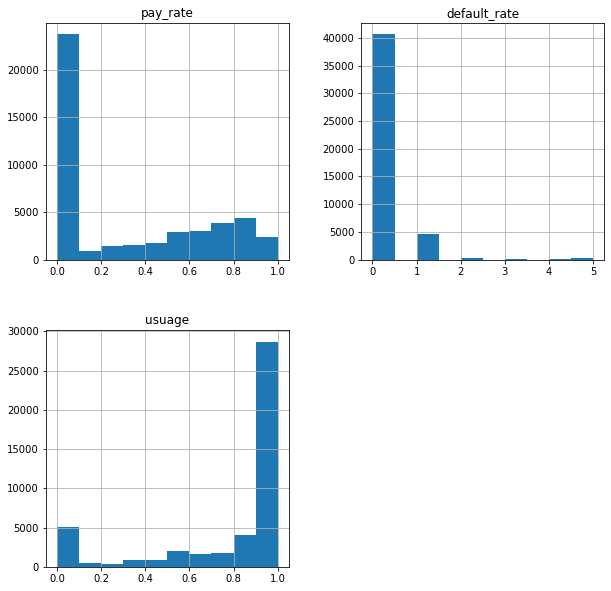

In [9]:
score = pd.DataFrame()
score['pay_rate'] = dfc_sum.paid_off / dfc_count.STATUS
score['default_rate'] = dfc_max.months
score['usuage'] = 1-dfc_mean.no_loan
score.hist(figsize=(10,10))

Text(0.5, 0, 'usuage')

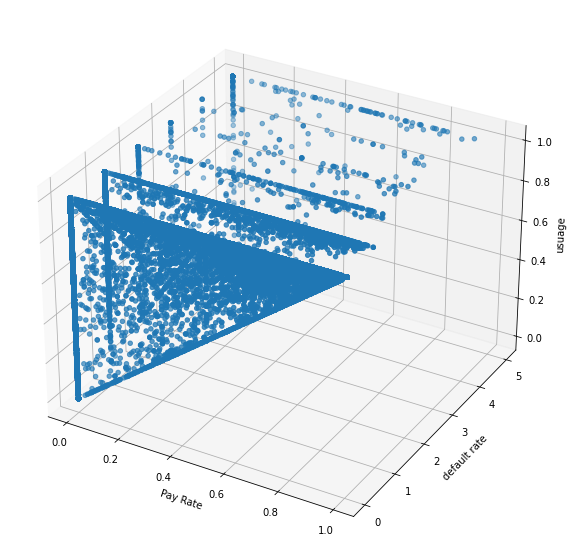

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(score['pay_rate'], score['default_rate'], score['usuage'])
ax.set_xlabel('Pay Rate')
ax.set_ylabel('default rate')
ax.set_zlabel('usuage')

array([[<AxesSubplot:xlabel='pay_rate', ylabel='pay_rate'>,
        <AxesSubplot:xlabel='default_rate', ylabel='pay_rate'>,
        <AxesSubplot:xlabel='usuage', ylabel='pay_rate'>],
       [<AxesSubplot:xlabel='pay_rate', ylabel='default_rate'>,
        <AxesSubplot:xlabel='default_rate', ylabel='default_rate'>,
        <AxesSubplot:xlabel='usuage', ylabel='default_rate'>],
       [<AxesSubplot:xlabel='pay_rate', ylabel='usuage'>,
        <AxesSubplot:xlabel='default_rate', ylabel='usuage'>,
        <AxesSubplot:xlabel='usuage', ylabel='usuage'>]], dtype=object)

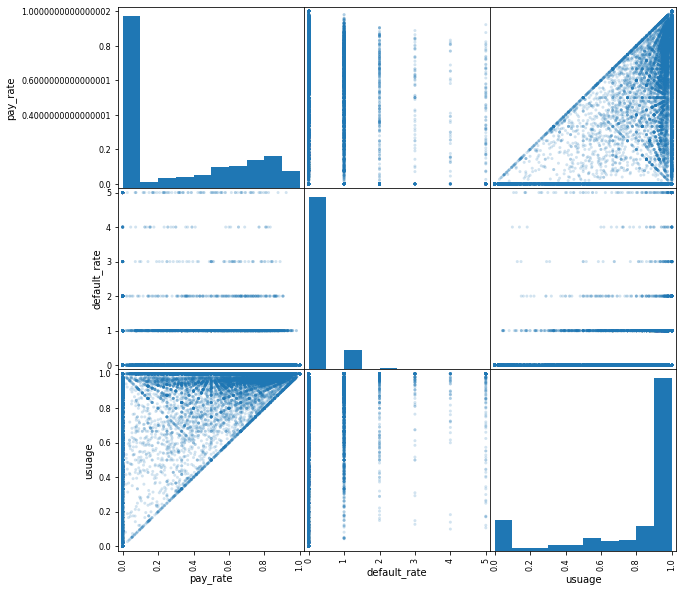

In [11]:
pd.plotting.scatter_matrix(score, figsize=(10,10), alpha=.2)

In [12]:
dfc_max['good'] = dfc_max.months < 1
y = dfc_max['good']

In [13]:
y = y.astype(int)
y.value_counts()

1    40635
0     5350
Name: good, dtype: int64

In [14]:
# Merge on ID
df = dfa.merge(y, how='inner', on='ID')

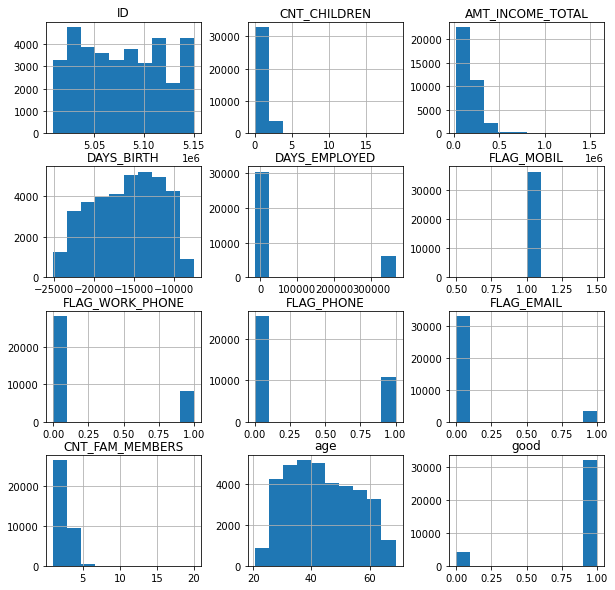

In [15]:
# Quic peak
df.hist(figsize=(10,10))
plt.show()

In [16]:
# data value counts
for key in df.keys():
    print(df[key].value_counts())

5048321    1
5137145    1
5038825    1
5096173    1
5100271    1
          ..
5061997    1
5125484    1
5114565    1
5047658    1
5048319    1
Name: ID, Length: 36457, dtype: int64
F    24430
M    12027
Name: CODE_GENDER, dtype: int64
N    22614
Y    13843
Name: FLAG_OWN_CAR, dtype: int64
Y    24506
N    11951
Name: FLAG_OWN_REALTY, dtype: int64
0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: CNT_CHILDREN, dtype: int64
135000.0    4309
180000.0    3097
157500.0    3089
112500.0    2956
225000.0    2926
            ... 
179271.0       1
44550.0        1
160200.0       1
31950.0        1
74061.0        1
Name: AMT_INCOME_TOTAL, Length: 265, dtype: int64
Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    24777
Higher education                  9864
Incomplet

Try regression with
- gender F
- own car F
- own realty F
- cnt children N
- AMT income N
- Income type C (5)
- Education C (5)
- Family status (5)

In [17]:
df.keys()

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'age', 'good'],
      dtype='object')

In [18]:
# Clean 
X = pd.DataFrame()
X['flag_male'] = df['CODE_GENDER'].map(dict(M=1,F=0))
X['flag_realty'] = df['FLAG_OWN_REALTY'].map(dict(Y=1,N=0))
X['flag_work_phone'] = df['FLAG_WORK_PHONE']
X['flag_car'] = df['FLAG_OWN_CAR'].map(dict(Y=1,N=0))
X['children'] = df['CNT_CHILDREN']
X['income'] = df['AMT_INCOME_TOTAL']
X['education'] = df['NAME_EDUCATION_TYPE']
X['housing'] = df['NAME_HOUSING_TYPE']
X['bad'] = 1-df['good']

In [19]:
X.describe()

,flag_male,flag_realty,flag_work_phone,flag_car,children,income,bad
count,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,3.645700e+04,36457.000000
mean,0.329895,0.672189,0.225526,0.379708,0.430315,1.866857e+05,0.117700
std,0.470181,0.469422,0.417934,0.485321,0.742367,1.017892e+05,0.322257
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.215000e+05,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.575000e+05,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,2.250000e+05,0.000000
max,1.000000,1.000000,1.000000,1.000000,19.000000,1.575000e+06,1.000000


In [20]:
for key in X.keys():
    print(key,sum(X[key].isnull()))

flag_male 0
flag_realty 0
flag_work_phone 0
flag_car 0
children 0
income 0
education 0
housing 0
bad 0


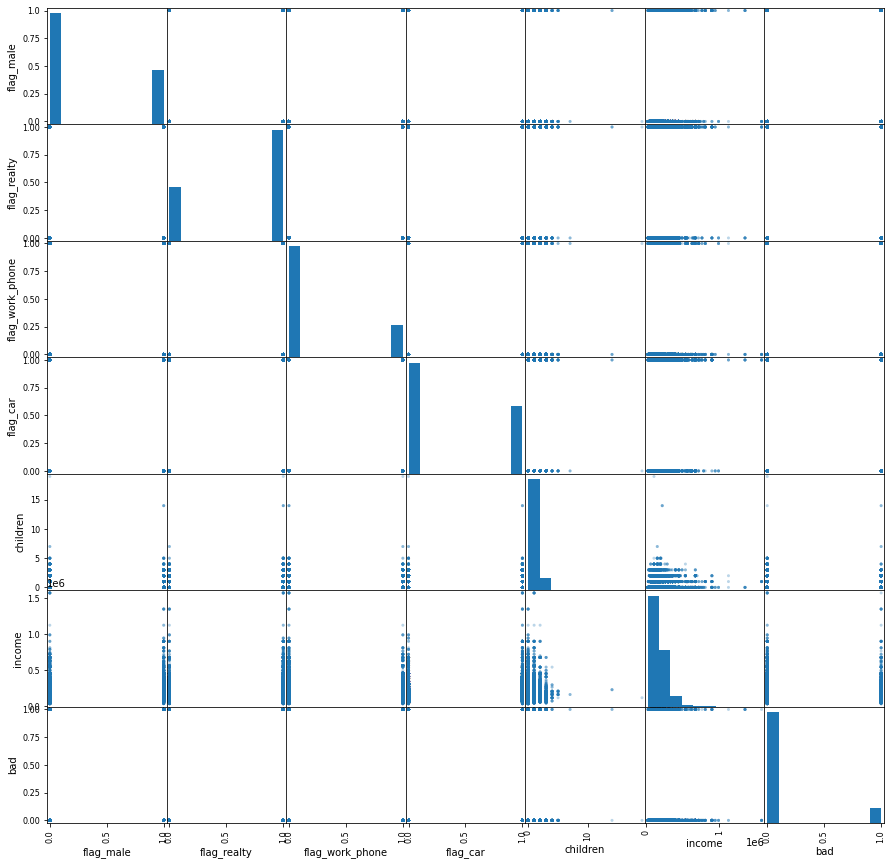

In [21]:
pd.plotting.scatter_matrix(X, figsize=(15,15), alpha=.3)
plt.show()

In [22]:
X.corr()

,flag_male,flag_realty,flag_work_phone,flag_car,children,income,bad
flag_male,1.000000,-0.050758,0.064994,0.361379,0.077690,0.197805,0.021257
flag_realty,-0.050758,1.000000,-0.207732,-0.015185,-0.000575,0.032719,-0.027990
flag_work_phone,0.064994,-0.207732,1.000000,0.021644,0.048091,-0.037746,-0.000149
flag_car,0.361379,-0.015185,0.021644,1.000000,0.105839,0.215506,-0.010580
children,0.077690,-0.000575,0.048091,0.105839,1.000000,0.033691,0.011525
income,0.197805,0.032719,-0.037746,0.215506,0.033691,1.000000,0.024202
bad,0.021257,-0.027990,-0.000149,-0.010580,0.011525,0.024202,1.000000


In [23]:
data = X.copy(deep=True)

# Build Model
predict bad creditors

In [25]:
data.head()

,flag_male,flag_realty,flag_work_phone,flag_car,children,income,education,housing
0,1,1,1,1,0,427500.0,Higher education,Rented apartment
1,1,1,1,1,0,427500.0,Higher education,Rented apartment
2,1,1,0,1,0,112500.0,Secondary / secondary special,House / apartment
3,0,1,0,0,0,270000.0,Secondary / secondary special,House / apartment
4,0,1,0,0,0,270000.0,Secondary / secondary special,House / apartment


In [26]:
# Layout framework
y = data['bad']
X = data
X.drop('bad',axis=1, inplace=True)

features = X.columns
cat_features = ['education','housing']
num_features = list(set(features) - set(cat_features))

KeyError: 'bad'

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('one_hot', OneHotEncoder()),
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features),
])

X_prepared = preprocessor.fit_transform(X)
preprocessor.transformers_[1][1].named_steps['one_hot'].get_feature_names(cat_features)

array(['education_Academic degree', 'education_Higher education',
       'education_Incomplete higher', 'education_Lower secondary',
       'education_Secondary / secondary special',
       'housing_Co-op apartment', 'housing_House / apartment',
       'housing_Municipal apartment', 'housing_Office apartment',
       'housing_Rented apartment', 'housing_With parents'], dtype=object)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = Pipeline(
    steps=[('preprocessor',preprocessor),('classifier', LogisticRegression(max_iter=1000))]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)
print('model score: {:4.2f}'.format(clf.score(X_dev, y_dev)))

model score: 0.88


In [64]:
# visualize pipeline
from sklearn import set_config

set_config(display="diagram")
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['flag_car', 'flag_male',
                                                   'children',
                                                   'flag_work_phone', 'income',
                                                   'flag_realty']),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['education', 'housing'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [61]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")

array([0.881937  , 0.881937  , 0.88212602, 0.88212602, 0.8819117 ])

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'classifier__penalty':['l2','l1']},
]

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train,y_train)

C:\Users\crosby\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\crosby\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\crosby\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\crosby\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\crosby\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties,

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['flag_car',
                                                                          'flag_male',
                                                                          'children',
                                                                          'flag_work_phone',
                                                                          'income',
                                                                          'flag_realty']),
                                                                        ('cat',
                       

In [ ]:
from sklearn import set_config

set_config(display="diagram")
full_pipline

In [ ]:
X_prepared.shape

In [ ]:
X.columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X_cat = X[['education','housing']]
X_1hot = ohe.fit_transform(X_cat)
ohe.categories_

In [ ]:
X_num.columns